In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix


In [3]:
data = pd.read_csv('Data/Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [5]:
data.drop(['User ID','Gender'],axis=1, inplace = True)
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
# calculate the Euclidean distance between two vectors
def euclidean_distance(a,b):
    dim = len(a) #No. of dimensions
    distance = 0
    for i in range(dim):
        distance += (a[i] - b[i])**2
    return np.sqrt((distance))      

In [7]:
X = data.iloc[:,2:4]
y = data.iloc[:,-1]
X.shape, y.shape

((400, 1), (400,))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                   random_state=1)
X_train.shape, X_test.shape

((300, 1), (100, 1))

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:

def knn_predict(X_train, X_test, y_train, y_test, k):
    
    # Counter to help with label voting
    from collections import Counter
    
    # Make predictions on the test data
    # Need output of 1 prediction per test data point
    y_pred = []

    for test_point in X_test:
        distances = []

        for train_point in X_train:
            distance = euclidean_distance(test_point, train_point)
            distances.append(distance)
        
        # Store distances in a dataframe
        df_dists = pd.DataFrame(data=distances, columns=['dist'], 
                                index=y_train.index)
        
        # Sort distances, and only consider the k closest points
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]
        
        # Create counter object to track the labels of k closest neighbors
        counter = Counter(y_train[df_nn.index])

        # Get most common label of all the nearest neighbors
        prediction = counter.most_common()[0][0]
        
        # Append prediction to output list
        y_pred.append(prediction)
        
    return y_pred

In [24]:
# Make predictions on test dataset
y_pred = knn_predict(X_train, X_test, y_train, y_test, k=7)
accuracy_score(y_test,y_pred)

1.0

In [26]:
confusion_matrix(y_test,y_pred)

array([[58,  0],
       [ 0, 42]], dtype=int64)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=9)
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)

print(f"Sklearn KNN Accuracy: {accuracy_score(y_test, y_pred_test)}")

Sklearn KNN Accuracy: 1.0


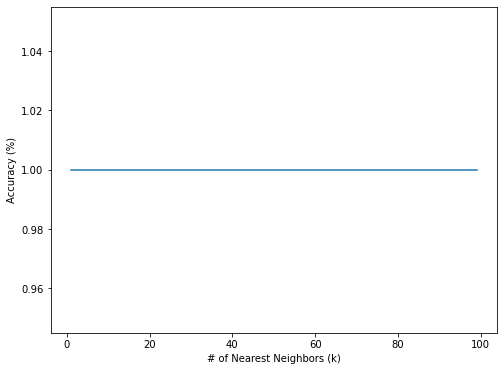

In [28]:
# Obtain accuracy score varying k from 1 to 99

accuracies = []

for k in range(1,100):
    y_pred = knn_predict(X_train, X_test, y_train, y_test, k)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot the results 

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,100), accuracies)
ax.set_xlabel('# of Nearest Neighbors (k)')
ax.set_ylabel('Accuracy (%)');